# Estatística descritiva univariada

## Tabela de distribuição de frequências e representações gráficas

As tabelas de distribuições de frequência podem ser utilizadas para representar a frequência de ocorrências de um conjunto de observações de variáveis qualitativas ou quantitativas.

No caso de variáveis qualitativas, a tabela representa a frequência de ocorrências de cada categoria da variável. Para as variáveis quantitativas discretas, a frequência de ocorrências é calculada para cada valor discreto da variável. Já os dados das variáveis contínuas são agrupados inicialmente em classes, e a partir daí são calculadas as
frequências de ocorrências para cada classe.

Uma tabela de distribuição de frequências usualmente comporta os seguintes cálculos:

- Frequência absoluta (*F<sub>i</sub>*): número de ocorrências de cada elemento *i* na amostra.
- Frequência relativa (*Fr<sub>i</sub>*): porcentagem relativa à frequência absoluta.
- Frequência acumulada (*F<sub>ac</sub>*): soma de todas as ocorrências até o elemento analisado.
- Frequência relativa acumulada (*Fr<sub>ac</sub>*}: porcentagem relativa à frequência acumulada (soma de todas as frequências relativas até o elemento analisado).

#### Exemplo 1

Um determinado hospital precisa de ao menos 60 doações de sangue por dia para manter seu estoque para transfusões. A seguinte base de dados apresenta o tipo sanguíneo para os doadores de um determinado dia. Utilizaremos tal base para construir uma tabela de distribuição de frequências.

In [1]:
import pandas as pd

DADOS = "./dados/blood_donors.csv"

df = pd.read_csv(DADOS)

df.head()

,donor_id,blood_type
0,1,a+
1,2,a+
2,3,a+
3,4,a+
4,5,a+


In [2]:
df.tail()

,donor_id,blood_type
55,56,o+
56,57,o+
57,58,o+
58,59,o-
59,60,o-


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   donor_id    60 non-null     int64 
 1   blood_type  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df.describe(exclude='number')

,blood_type
count,60
unique,8
top,o+
freq,32


In [5]:
df['blood_type'].value_counts(normalize=True).sort_index()

blood_type
a+     0.250000
a-     0.033333
ab+    0.016667
ab-    0.016667
b+     0.100000
b-     0.016667
o+     0.533333
o-     0.033333
Name: proportion, dtype: float64

In [6]:
df_estatistica = pd.DataFrame()
# quantidade de ocorrencia
df_estatistica['Frequencia']= df['blood_type'].value_counts().sort_index()
# %
df_estatistica['frequencia_relativa']= df['blood_type'].value_counts(normalize=True).sort_index()
#soma dos valores
df_estatistica['frequencia_acumulada']= df_estatistica['Frequencia'].cumsum()
#soma da frenquencia relativa
df_estatistica['frequencia_relativa_acumulada']= df_estatistica['frequencia_relativa'].cumsum()


df_estatistica


,Frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
blood_type,,,,
a+,15,0.250000,15,0.250000
a-,2,0.033333,17,0.283333
ab+,1,0.016667,18,0.300000
ab-,1,0.016667,19,0.316667
b+,6,0.100000,25,0.416667
b-,1,0.016667,26,0.433333
o+,32,0.533333,58,0.966667
o-,2,0.033333,60,1.000000


In [7]:
from auxiliares import tabela_distribuicao_frequencias

df_tabela_dist_freq=tabela_distribuicao_frequencias(df,'blood_type')
df_tabela_dist_freq

,Frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
blood_type,,,,
a+,15,0.250000,15,0.250000
a-,2,0.033333,17,0.283333
ab+,1,0.016667,18,0.300000
ab-,1,0.016667,19,0.316667
b+,6,0.100000,25,0.416667
b-,1,0.016667,26,0.433333
o+,32,0.533333,58,0.966667
o-,2,0.033333,60,1.000000


<Axes: xlabel='blood_type', ylabel='count'>

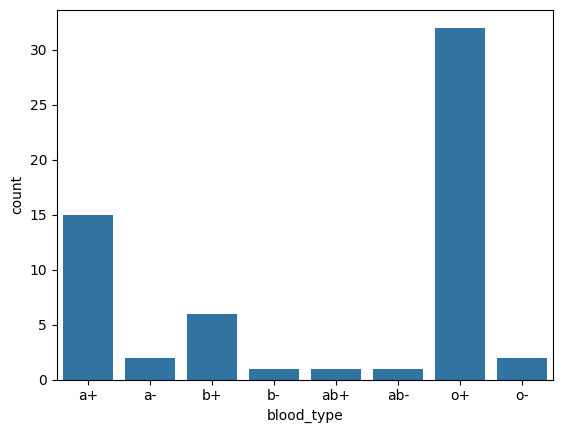

In [8]:
import seaborn as sns

sns.countplot(data = df,x='blood_type')

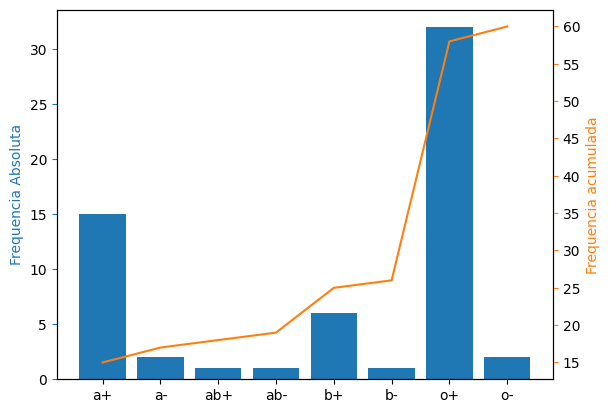

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(df_tabela_dist_freq.index, df_tabela_dist_freq['Frequencia'],color='C0')

ax2.plot(df_tabela_dist_freq.index, df_tabela_dist_freq['frequencia_acumulada'],color='C1')


ax.set_ylabel("Frequencia Absoluta",color='C0')
ax.tick_params(axis='y',color='C0')

ax2.set_ylabel("Frequencia acumulada",color='C1')
ax2.tick_params(axis='y',color='C1')

ax2.yaxis.set_major_locator(mtick.MultipleLocator(base=5.0))

plt.show()

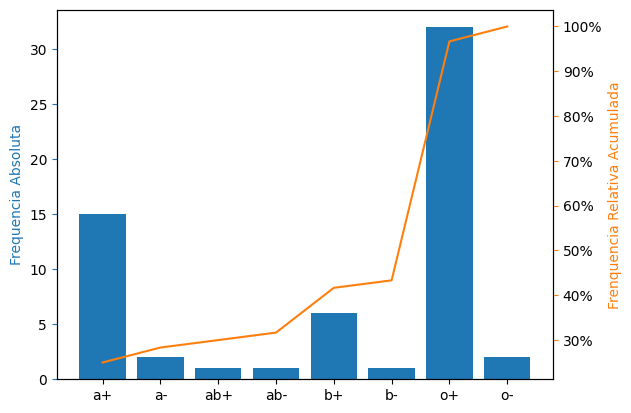

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(df_tabela_dist_freq.index, df_tabela_dist_freq['Frequencia'],color='C0')

ax2.plot(df_tabela_dist_freq.index, df_tabela_dist_freq['frequencia_relativa_acumulada'],color='C1')


ax.set_ylabel("Frequencia Absoluta",color='C0')
ax.tick_params(axis='y',color='C0')

ax2.set_ylabel("Frenquencia Relativa Acumulada",color='C1')
ax2.tick_params(axis='y',color='C1')


ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()